Step 1: Import Required Libraries

In [1]:
import pandas as pd  # For handling datasets
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For statistical plots
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.preprocessing import StandardScaler  # For feature scaling

Step 2: Load the Dataset

In [7]:
# Define the path to the dataset (update path if necessary)
file_path = "../data/raw_data.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 8.26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 8.26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 8.26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 8.26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 8.26,3.39,17850.0,United Kingdom


Step 3: Basic Information About the Dataset

In [10]:
# Print dataset summary (columns, non-null values, data types)
print("\nDataset Info:\n")
df.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
# Check for missing values in each column
print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())


Missing Values in Each Column:

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [12]:
# Display summary statistics for numerical features
print("\nStatistical Summary of Numerical Features:\n")
print(df.describe())


Statistical Summary of Numerical Features:

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


Step 4: Check for Duplicate Entries

In [13]:
# Count the number of duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows in Dataset: {duplicates}")


Number of Duplicate Rows in Dataset: 5268


Step 5: Visualizing Feature Distributions

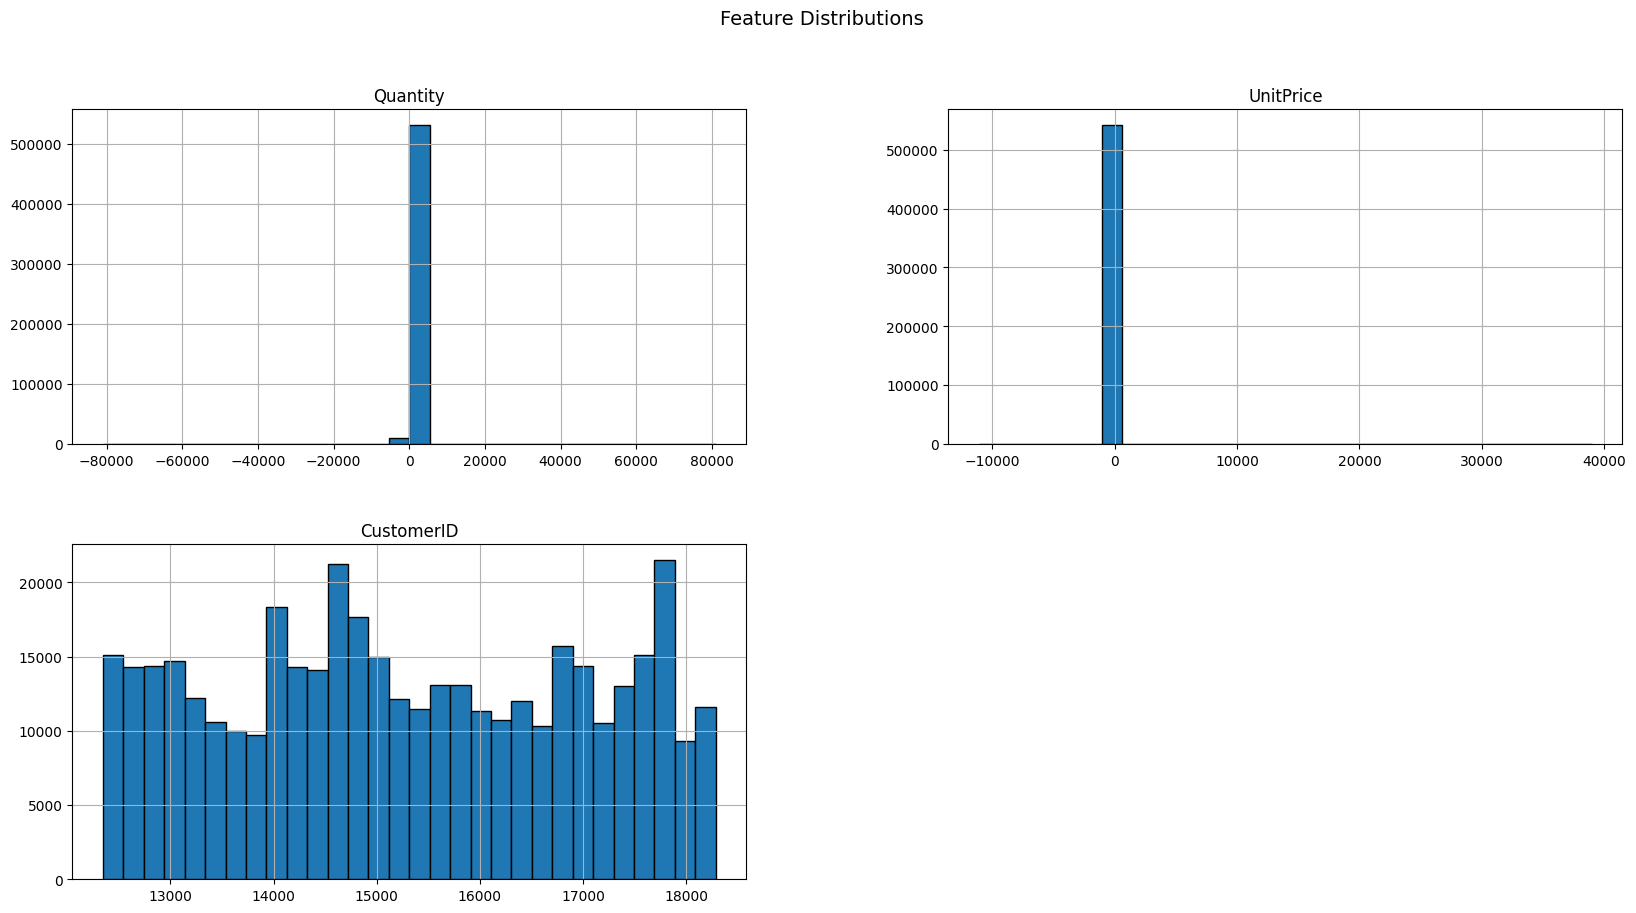

In [19]:
# Generate histograms for all numerical features
df.hist(figsize=(20, 10), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

Step 6: Correlation Heatmap

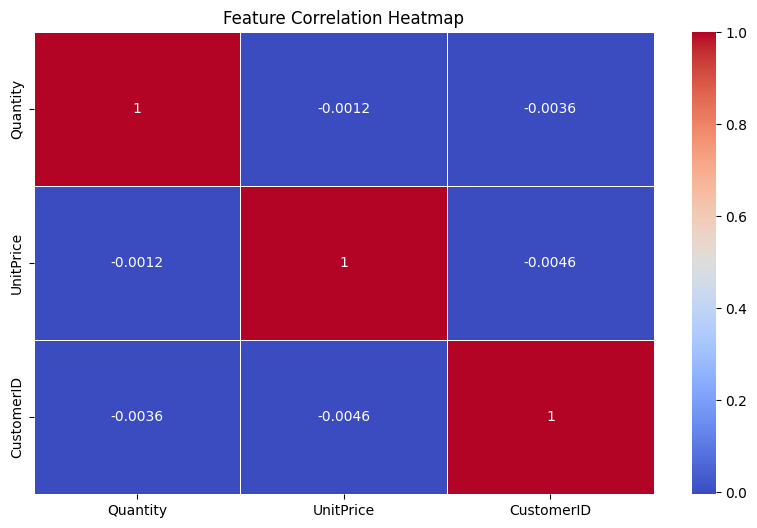

In [21]:
# Select only numeric columns (excluding categorical/text columns)
numeric_df = df.select_dtypes(include=[np.number])

# Check if numeric columns are available for correlation
if numeric_df.shape[1] > 1:  # Ensure there are at least 2 numeric columns
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()
else:
    print("Not enough numerical features for correlation analysis.")

Step 7: Dimensionality Reduction using PCA

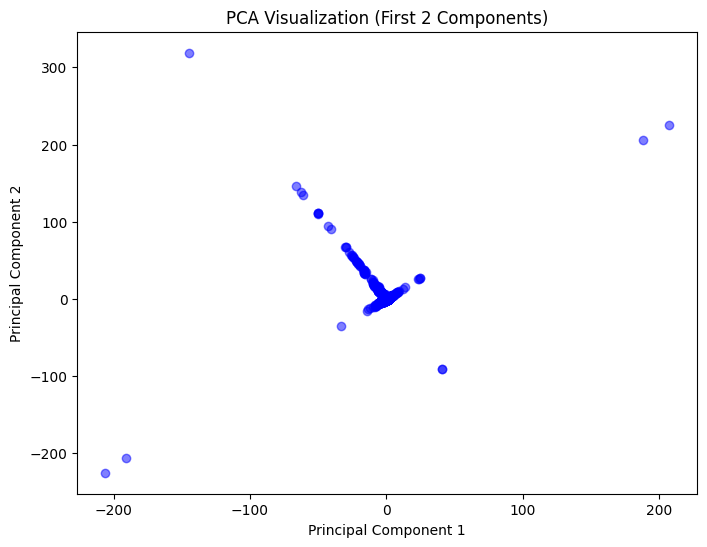

In [23]:
# ---------------------------------------------
# Step 7: Dimensionality Reduction using PCA
# ---------------------------------------------

# Step 7.1: Standardize the Data (Scaling)
# PCA is sensitive to different scales, so we normalize the data

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Step 7.2: Handle Missing Values by Replacing NaNs with Column Mean
numeric_df.fillna(numeric_df.mean(), inplace=True)  # Fill missing values

# Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numeric_df)

# Step 7.3: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
df_pca = pca.fit_transform(df_scaled)

# Step 7.4: Visualizing PCA Results
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.5, color="blue")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization (First 2 Components)")
plt.show()

Step 8: Save Cleaned Data for Next Steps

In [24]:
# Save the cleaned dataset for further processing
df.to_csv("../data/cleaned_data.csv", index=False)

print("\nCleaned dataset saved successfully as 'cleaned_data.csv'")


Cleaned dataset saved successfully as 'cleaned_data.csv'
